<a href="https://colab.research.google.com/github/rohansikdar/IOT-projects/blob/master/A_single_neuron_model_to_convert_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp_df=pd.read_csv('/content/drive/MyDrive/Celsius+to+Fahrenheit.csv')

In [ ]:
temp_df.head(8)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4


In [ ]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


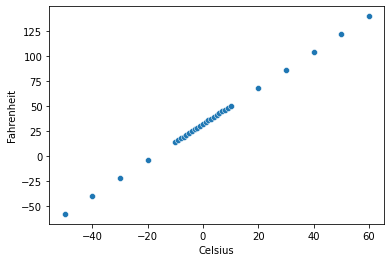

In [13]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

In [14]:
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [15]:
x_train.shape

(30,)

In [16]:
y_train.shape

(30,)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [23]:
epochs_hist = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 9ms/step - loss: 1.6161
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4524
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2932
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1390
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9941
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8639
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7522
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6597
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5833
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5182
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4594
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4035
Epoch 13/100
1/1 [==============================] - 0s 5ms/s

In [24]:
epochs_hist.history.keys()

dict_keys(['loss'])

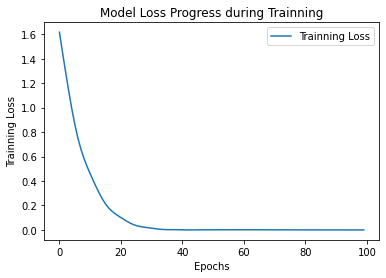

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress during Trainning')
plt.xlabel('Epochs')
plt.ylabel('Trainning Loss')
plt.legend(['Trainning Loss'])

In [28]:
model.get_weights()

[array([[1.7999609]], dtype=float32), array([32.003647], dtype=float32)]

In [31]:
Temp_C = 5
Temp_F = model.predict([Temp_C])
print('Temperature in DegF using Trained ANN=', Temp_F)


Temperature in DegF using Trained ANN= [[41.003452]]


In [32]:
# let's confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temperature in DegF using Equation =', Temp_F)

Temperature in DegF using Equation = 41.0
